In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
data =pd.read_csv("A:/DataSets/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mms = MinMaxScaler()
df  = mms.fit_transform(data.drop(["Genre","CustomerID","Age"], axis = 1))

In [5]:
df = pd.DataFrame(df, columns = ["Annual Income (k$)", "Spending Score (1-100)"] )

In [6]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


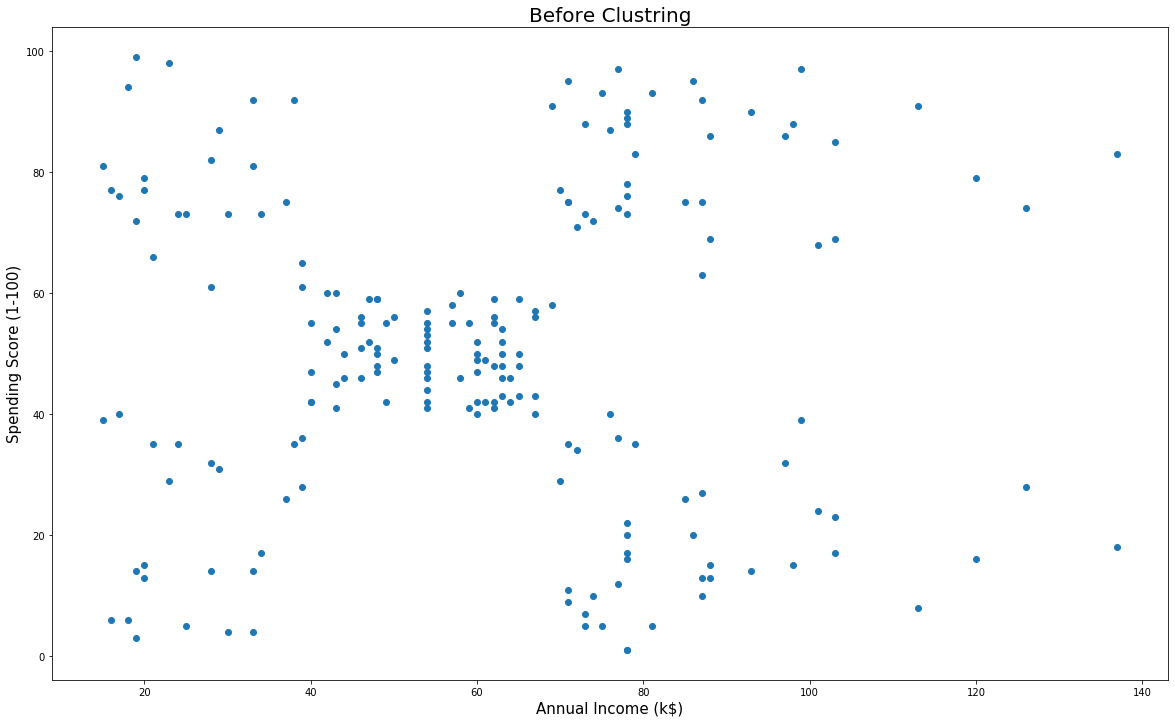

In [7]:
plt.figure(figsize = [20,12 ])
plt.title("Before Clustring" , size = 20)
plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)" , size = 15)
plt.ylabel("Spending Score (1-100)",size = 15)
plt.show()

In [8]:
kms = []
ran = range(1,10)
for i in ran:
    km = KMeans(n_clusters = i)
    km.fit(df)
    kms.append(km.inertia_)
    

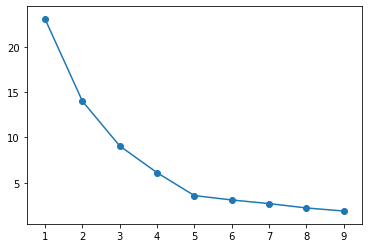

In [9]:
plt.plot(range(1,10),kms)
plt.scatter(range(1,10),kms)
plt.show()

In [10]:
km = KMeans(n_clusters = 5)
y_pred = km.fit_predict(df)
df["cluster"] = y_pred
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,0.387755,1
1,0.000000,0.816327,3
2,0.008197,0.051020,1
3,0.008197,0.775510,3
4,0.016393,0.397959,1


In [11]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

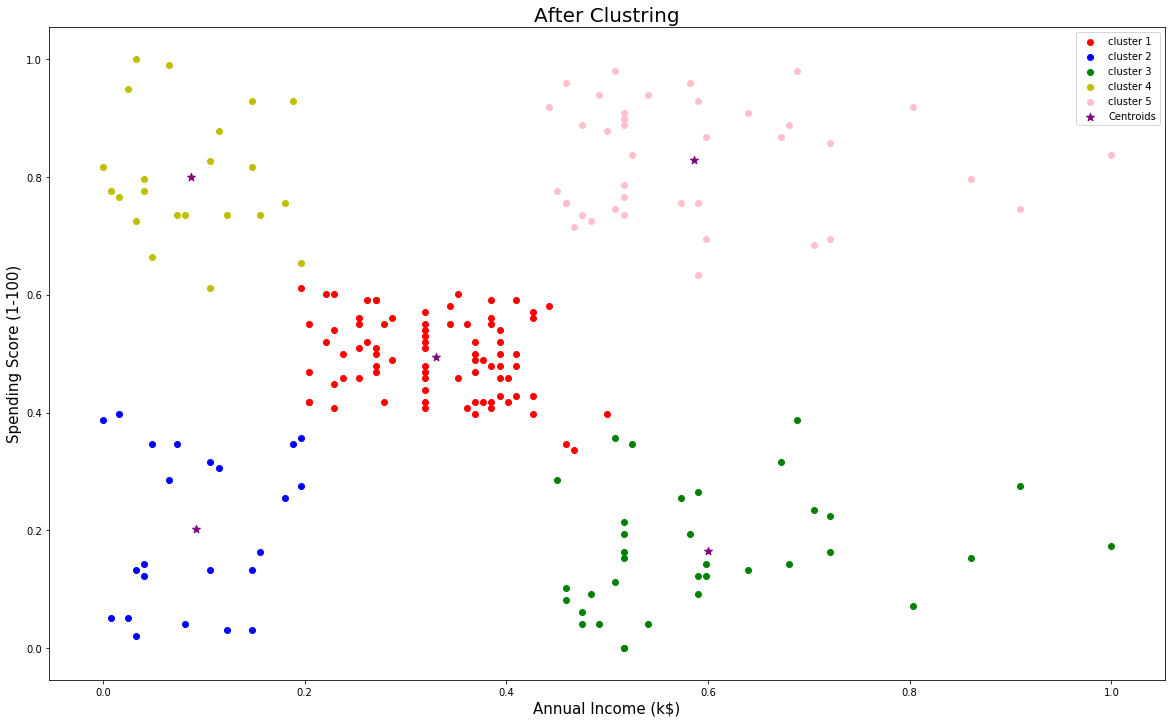

In [12]:

plt.figure(figsize = [20,12 ])
plt.title("After Clustring" , size = 20)
plt.scatter(df1["Annual Income (k$)"] , df1["Spending Score (1-100)"] , color = 'r',label = "cluster 1")
plt.scatter(df2["Annual Income (k$)"] , df2["Spending Score (1-100)"] , color = 'b',label = "cluster 2")
plt.scatter(df3["Annual Income (k$)"] , df3["Spending Score (1-100)"] , color = 'g',label = "cluster 3")
plt.scatter(df4["Annual Income (k$)"] , df4["Spending Score (1-100)"] , color = 'y',label = "cluster 4")
plt.scatter(df5["Annual Income (k$)"] , df5["Spending Score (1-100)"] , color = 'pink',label = "cluster 5")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker = "*",s = 70 , color = "purple" , label = "Centroids")
plt.xlabel("Annual Income (k$)" , size = 15)
plt.ylabel("Spending Score (1-100)",size = 15)
plt.legend(loc = "best")
plt.show()
